EOF
Top-1024,Sketch:8*5500
Execution time: 238.151 seconds.
Top_list with 155648 bytes.
Sketch with 176576 bytes.
Total size 324.4375 kbytes, 
Precision:  0.611
Find:626
Top_ARE: 0.0238
Top_AAE: 132.1613
Estimate time:  0.480 seconds.


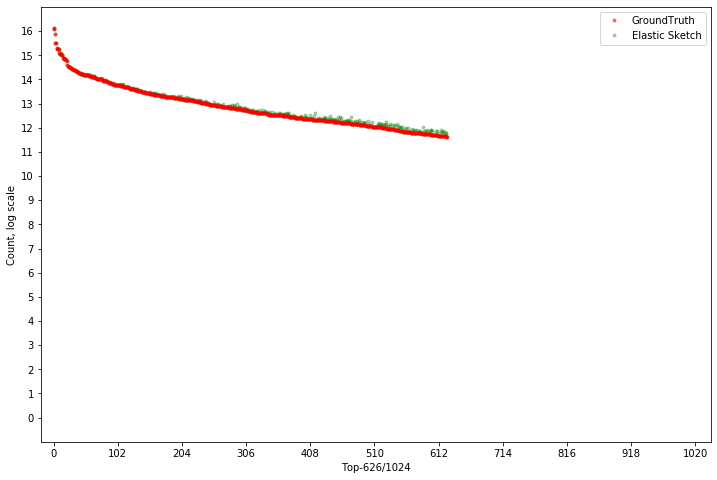

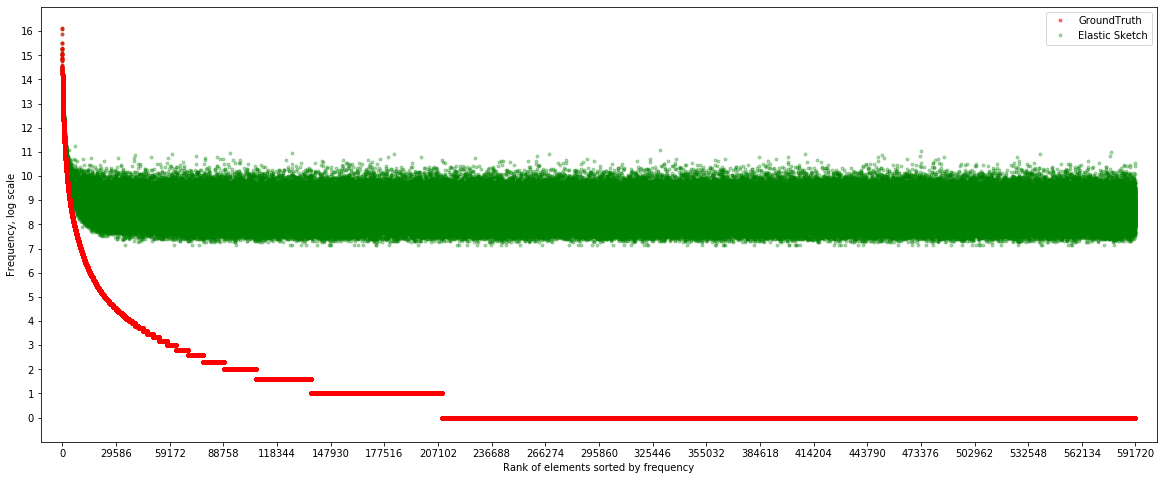

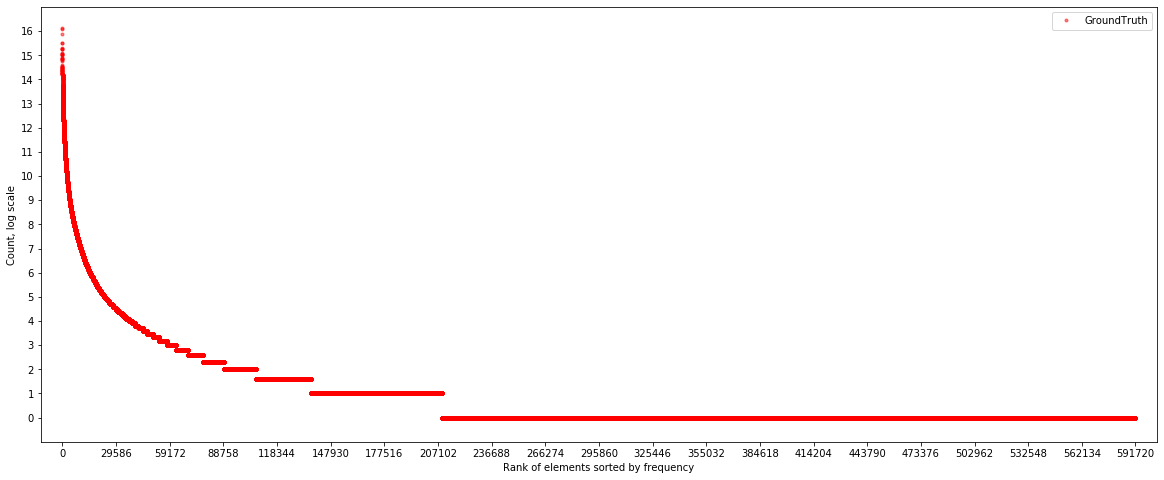

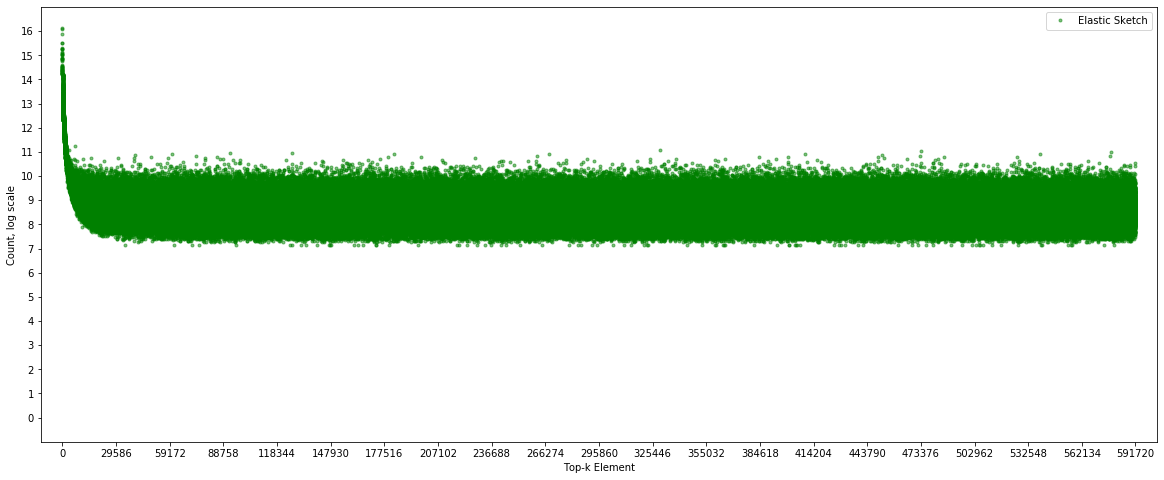

In [3]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=5500
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))



EOF
Top-1024,Sketch:8*8750
Execution time: 210.476 seconds.
Top_list with 147456 bytes.
Sketch with 280576 bytes.
Total size 418.0 kbytes, 
Precision:  0.615
Find:630
Top_ARE: 0.0117
Top_AAE: 61.5508
Estimate time:  0.451 seconds.


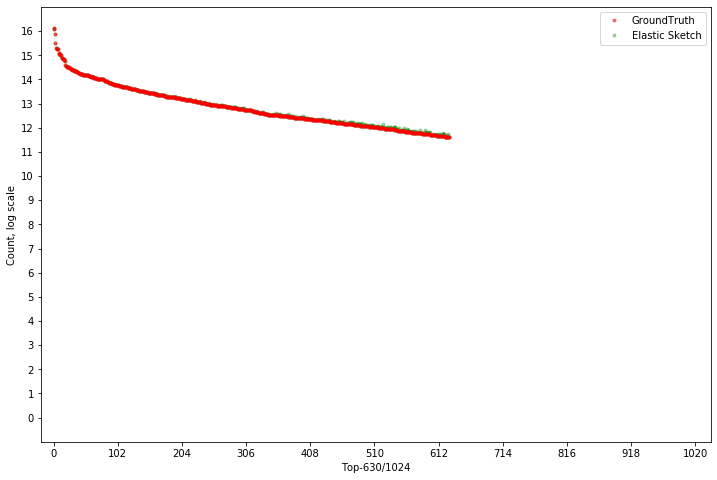

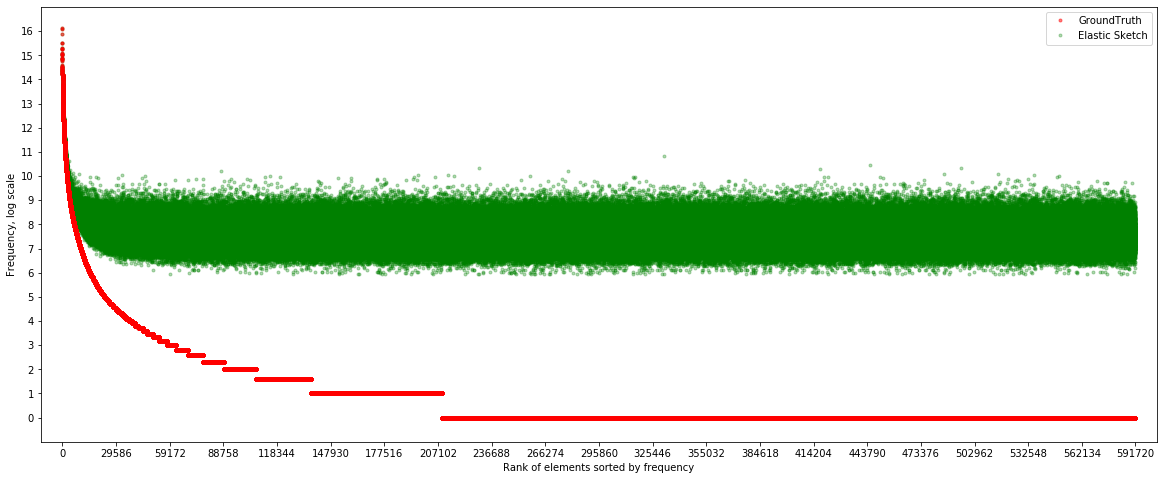

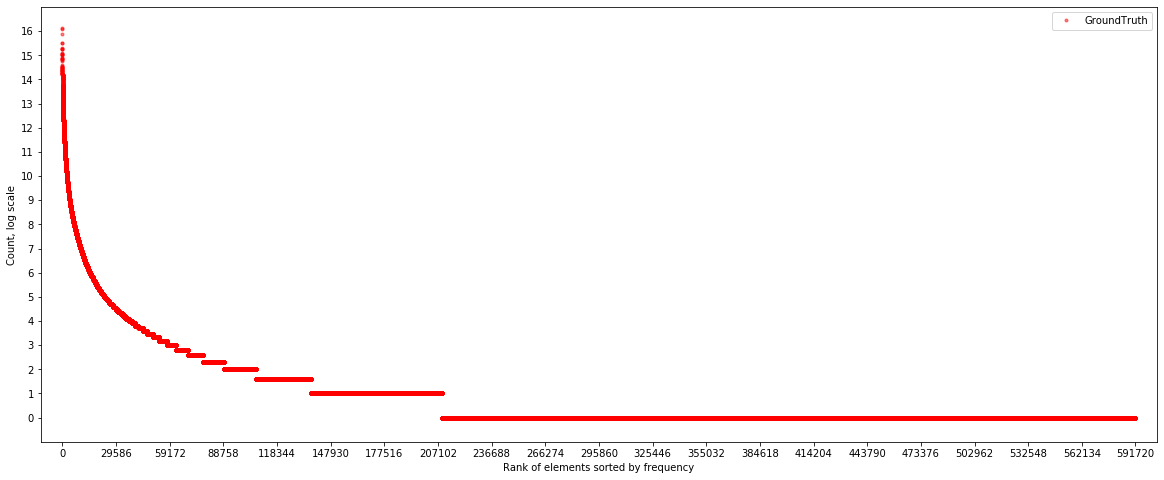

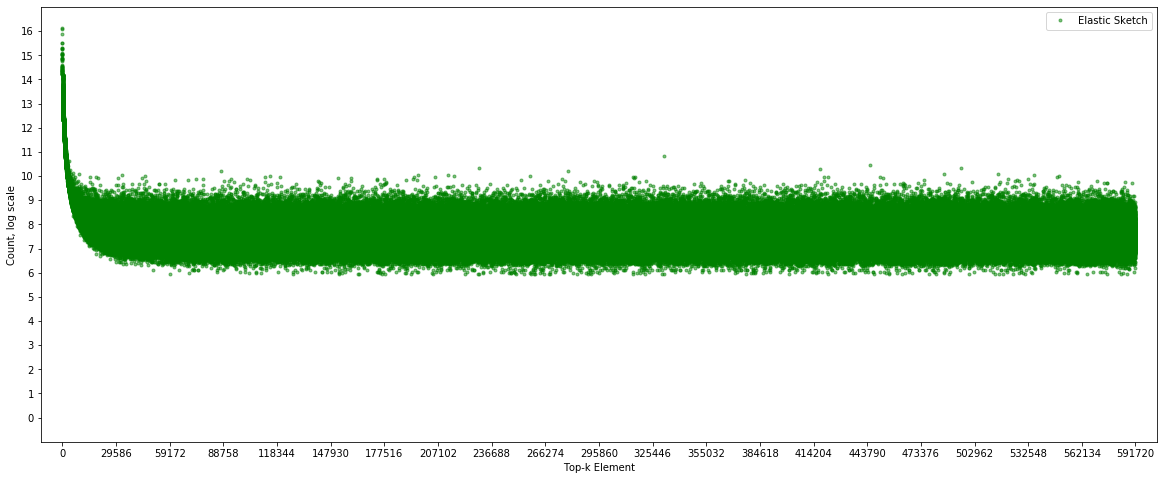

In [4]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=8750
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))



EOF
Top-1024,Sketch:8*12000
Execution time: 209.476 seconds.
Top_list with 147456 bytes.
Sketch with 384576 bytes.
Total size 519.5625 kbytes, 
Precision:  0.597
Find:611
Top_ARE: 0.0079
Top_AAE: 43.0147
Estimate time:  0.440 seconds.


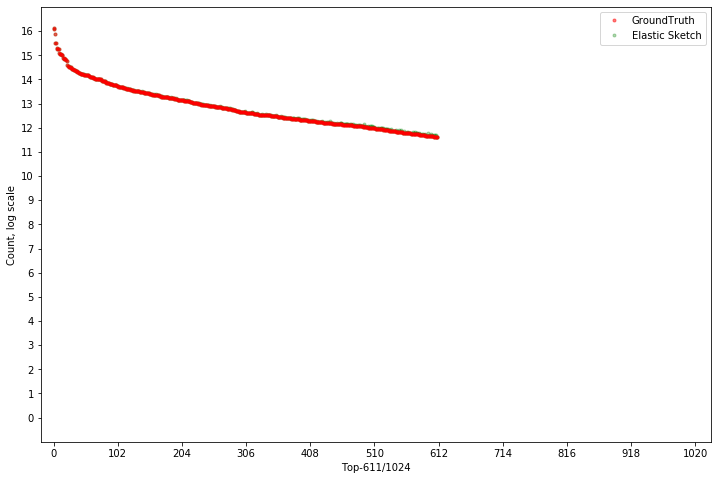

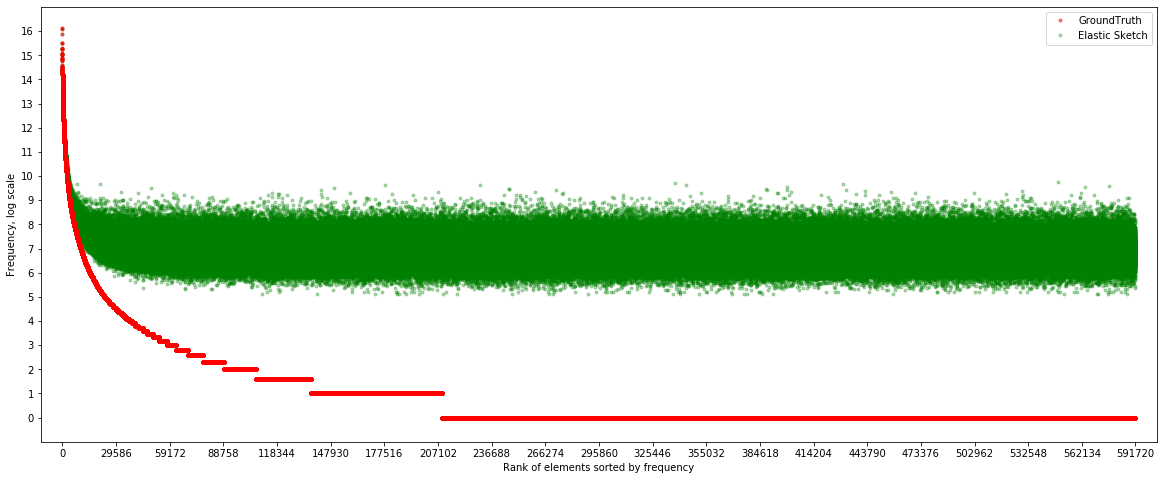

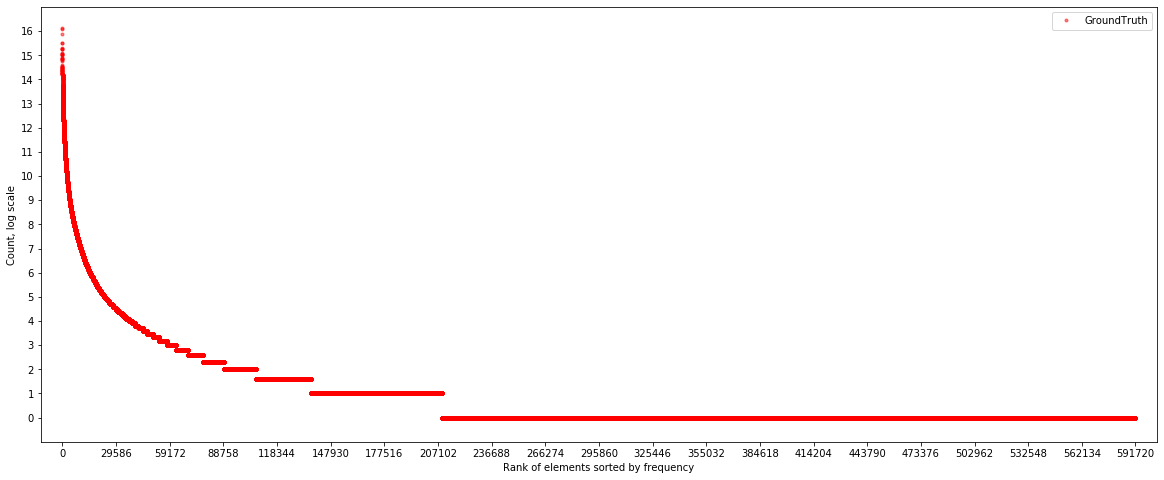

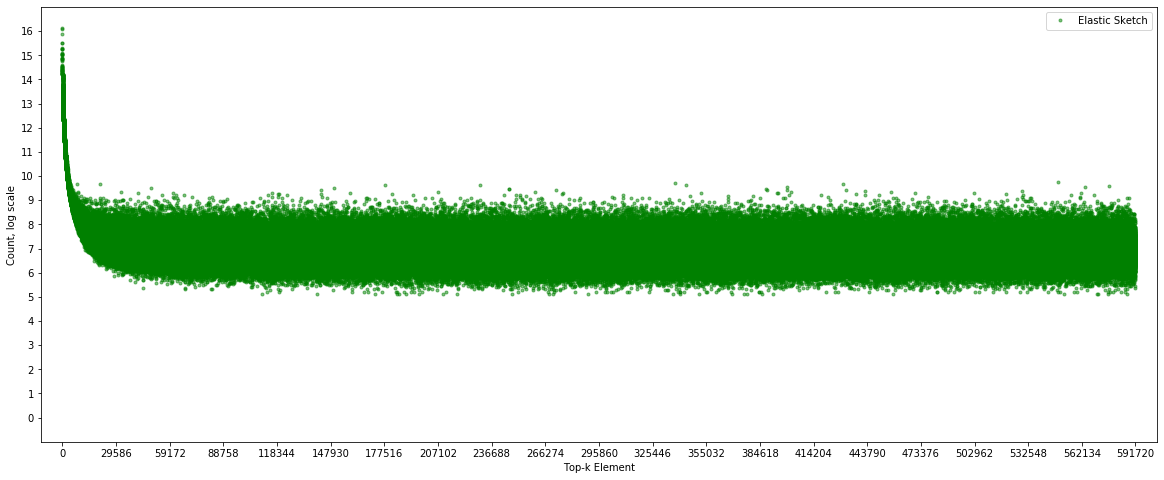

In [5]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=12000
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))



EOF
Top-1024,Sketch:8*15000
Execution time: 201.094 seconds.
Top_list with 155648 bytes.
Sketch with 480576 bytes.
Total size 621.3125 kbytes, 
Precision:  0.614
Find:629
Top_ARE: 0.0055
Top_AAE: 31.5898
Estimate time:  0.445 seconds.


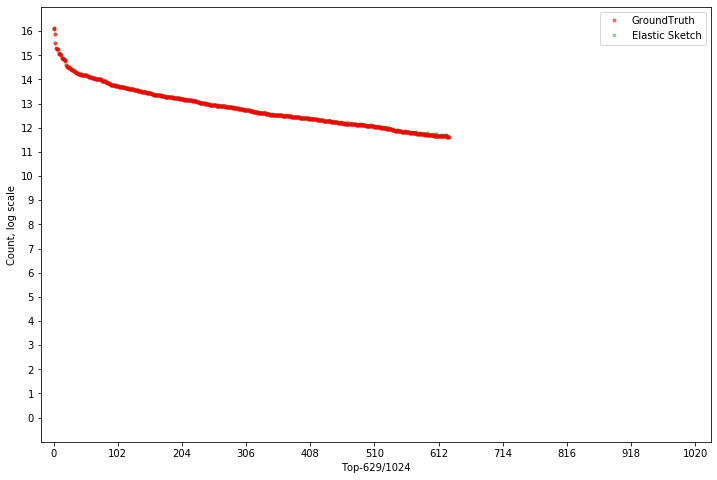

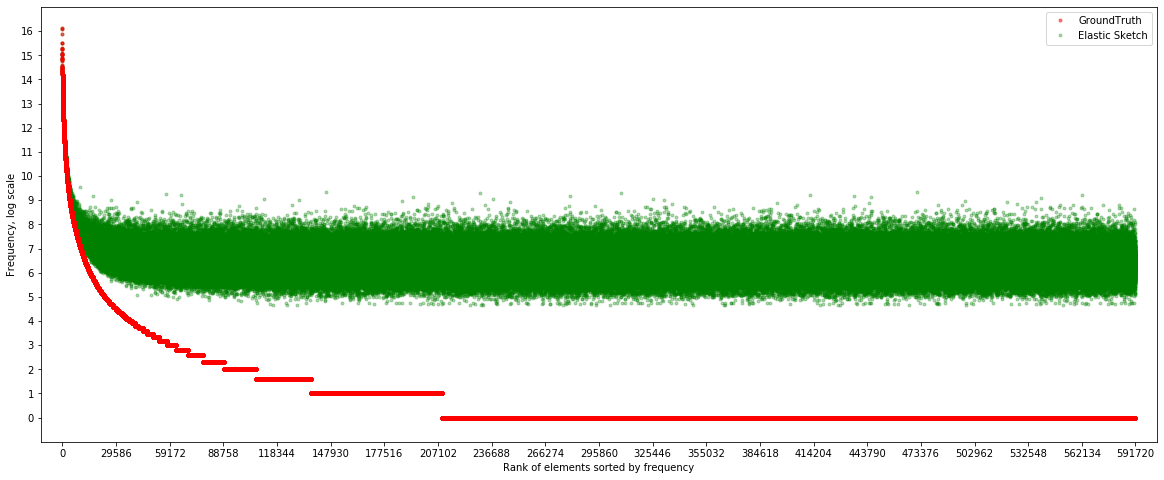

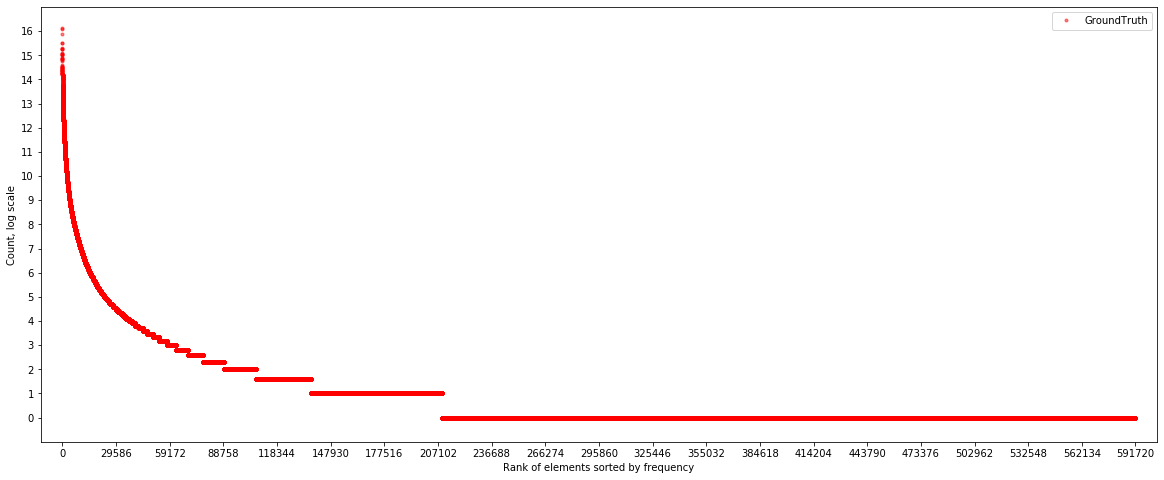

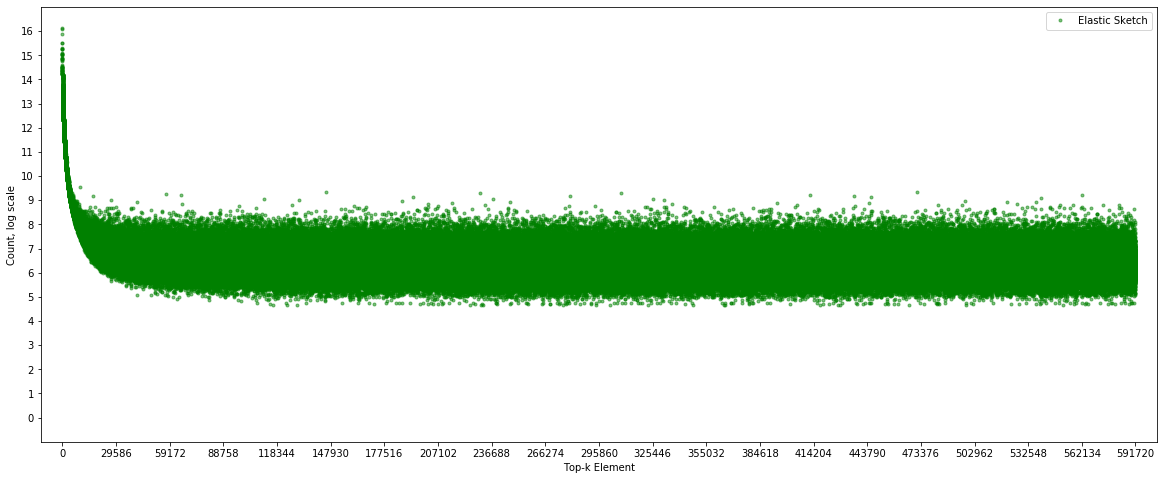

In [6]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=15000
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))



EOF
Top-1024,Sketch:8*18250
Execution time: 203.626 seconds.
Top_list with 147456 bytes.
Sketch with 584576 bytes.
Total size 714.875 kbytes, 
Precision:  0.595
Find:609
Top_ARE: 0.0040
Top_AAE: 22.0509
Estimate time:  0.458 seconds.


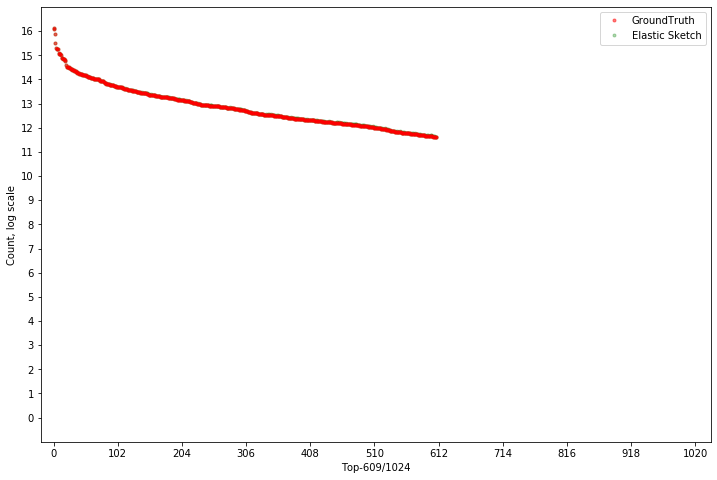

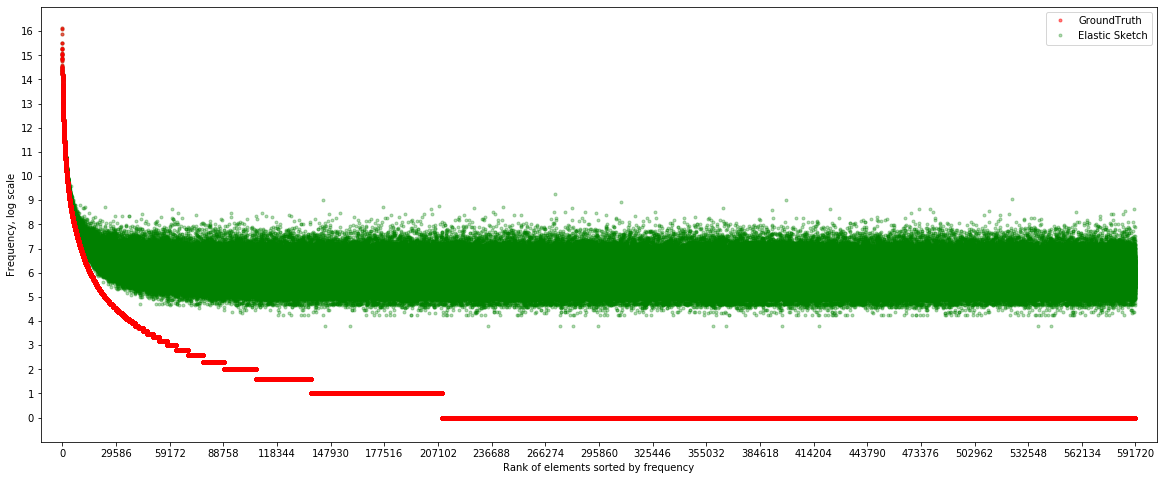

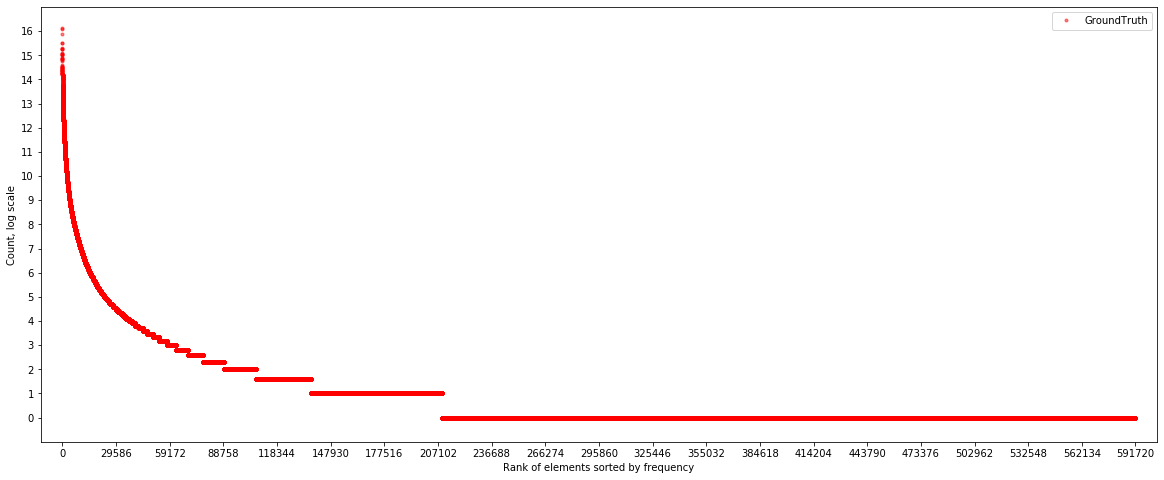

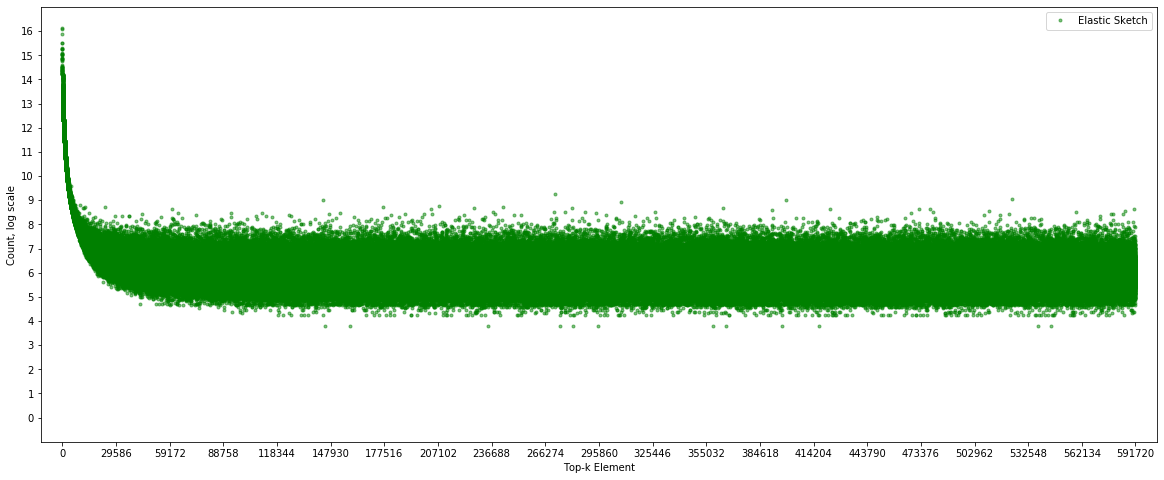

In [7]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=18250
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))



EOF
Top-1024,Sketch:8*21500
Execution time: 205.514 seconds.
Top_list with 147456 bytes.
Sketch with 688576 bytes.
Total size 816.4375 kbytes, 
Precision:  0.609
Find:624
Top_ARE: 0.0031
Top_AAE: 18.1554
Estimate time:  0.433 seconds.


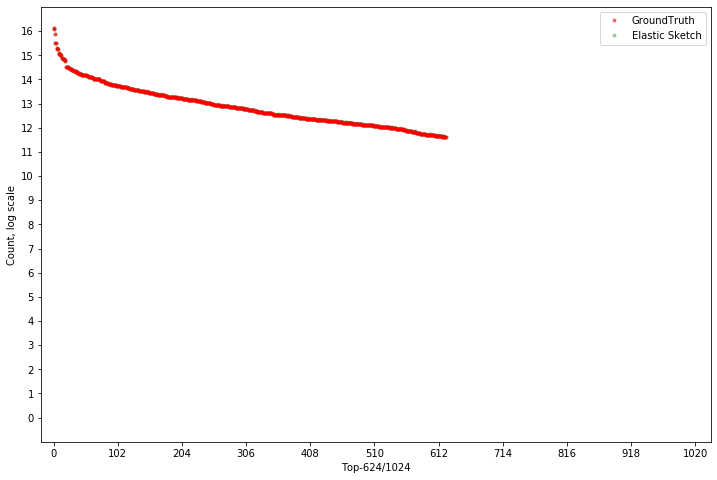

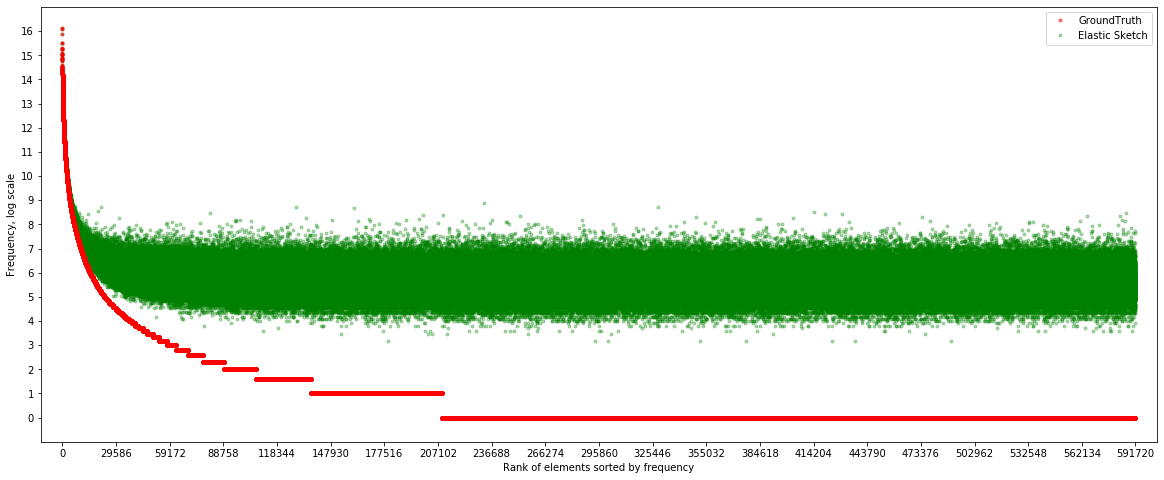

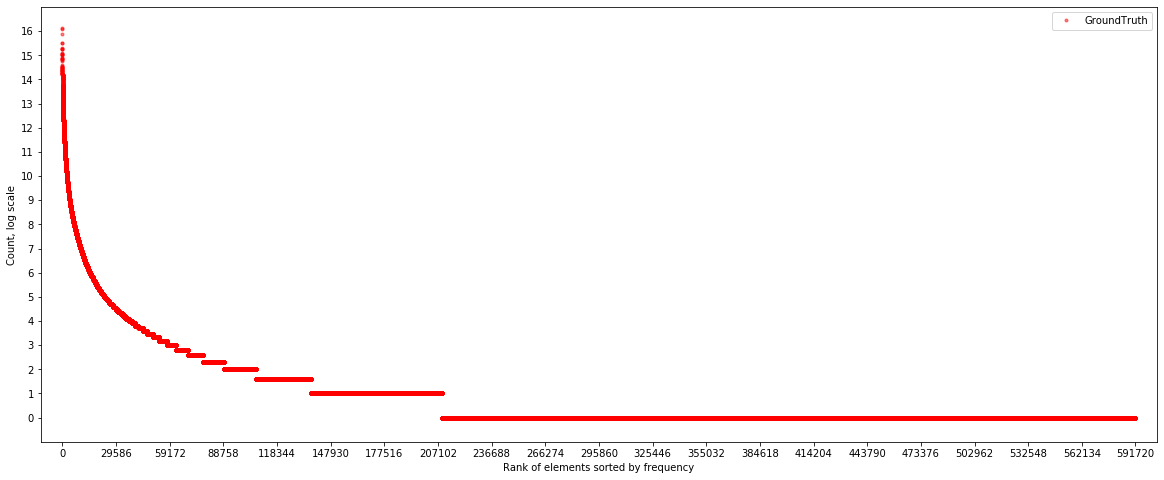

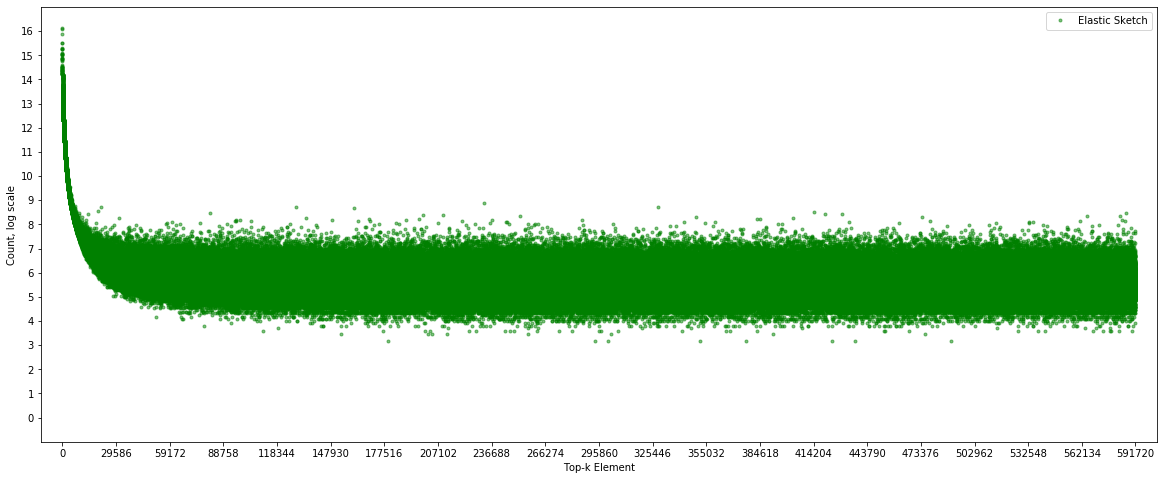

In [8]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=21500
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))



EOF
Top-1024,Sketch:8*24750
Execution time: 211.057 seconds.
Top_list with 147456 bytes.
Sketch with 792576 bytes.
Total size 918.0 kbytes, 
Precision:  0.611
Find:626
Top_ARE: 0.0024
Top_AAE: 13.8754
Estimate time:  0.462 seconds.


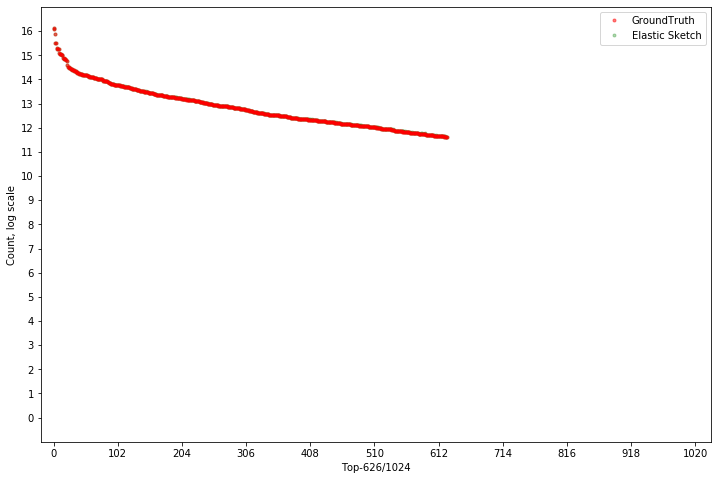

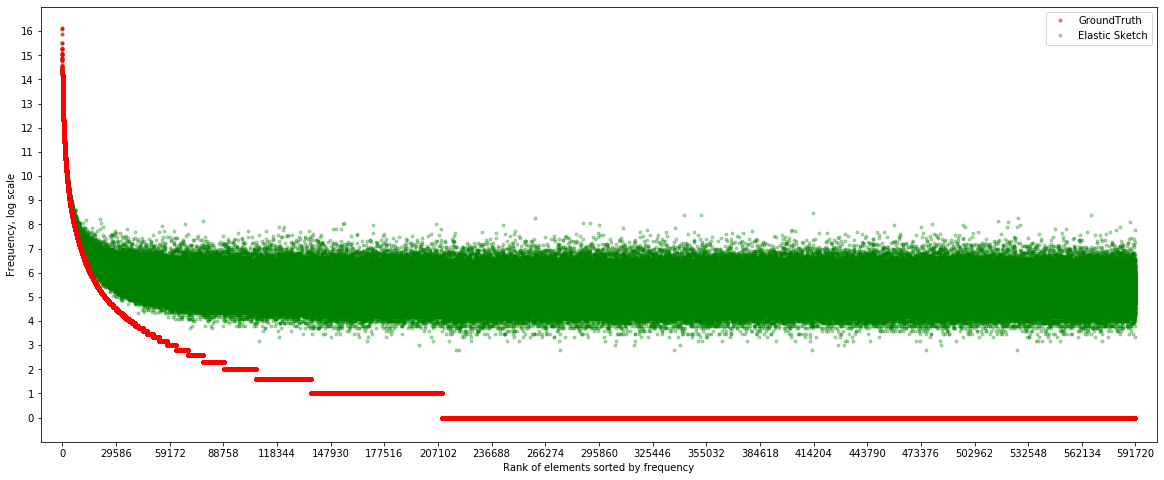

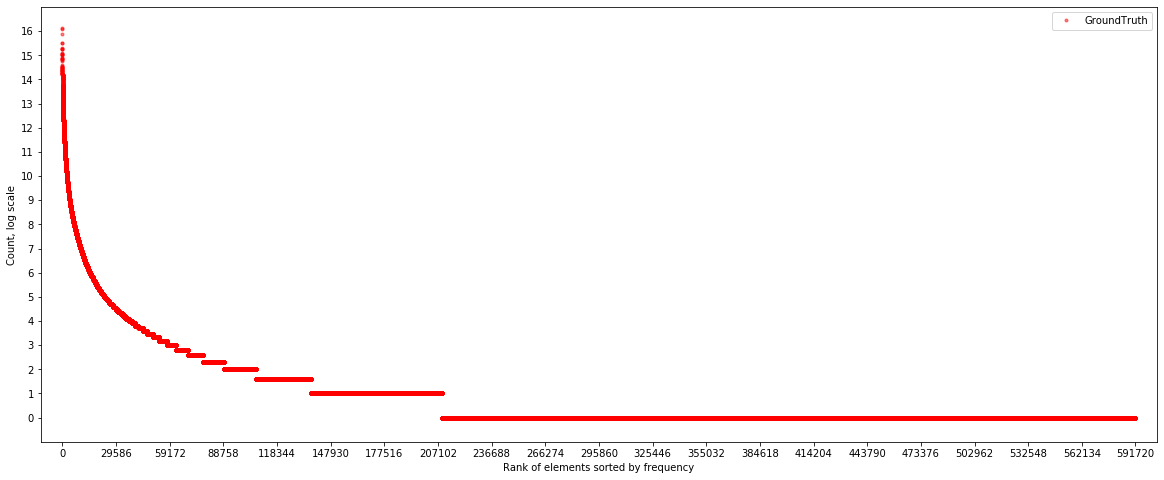

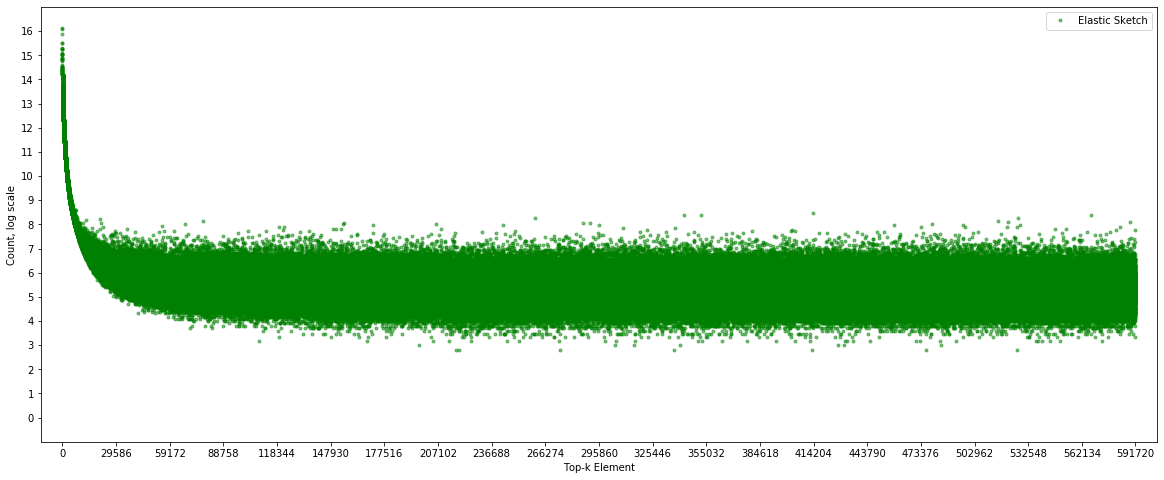

In [9]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=24750
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))



EOF
Top-1024,Sketch:8*28000
Execution time: 212.921 seconds.
Top_list with 155648 bytes.
Sketch with 896576 bytes.
Total size 1027.5625 kbytes, 
Precision:  0.590
Find:604
Top_ARE: 0.0018
Top_AAE: 9.8709
Estimate time:  0.440 seconds.


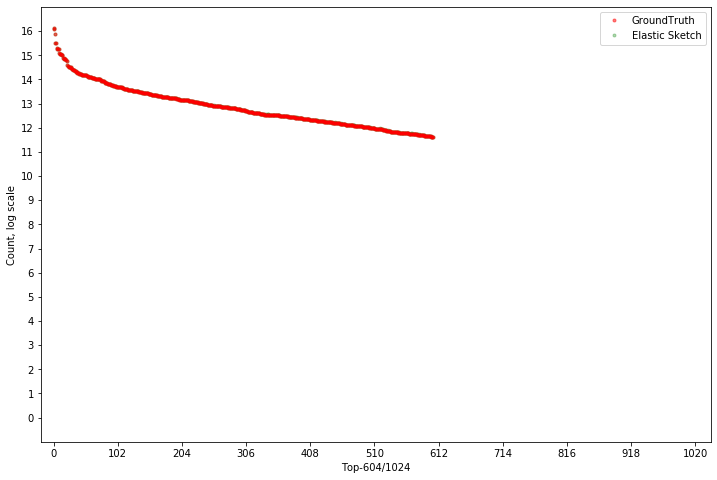

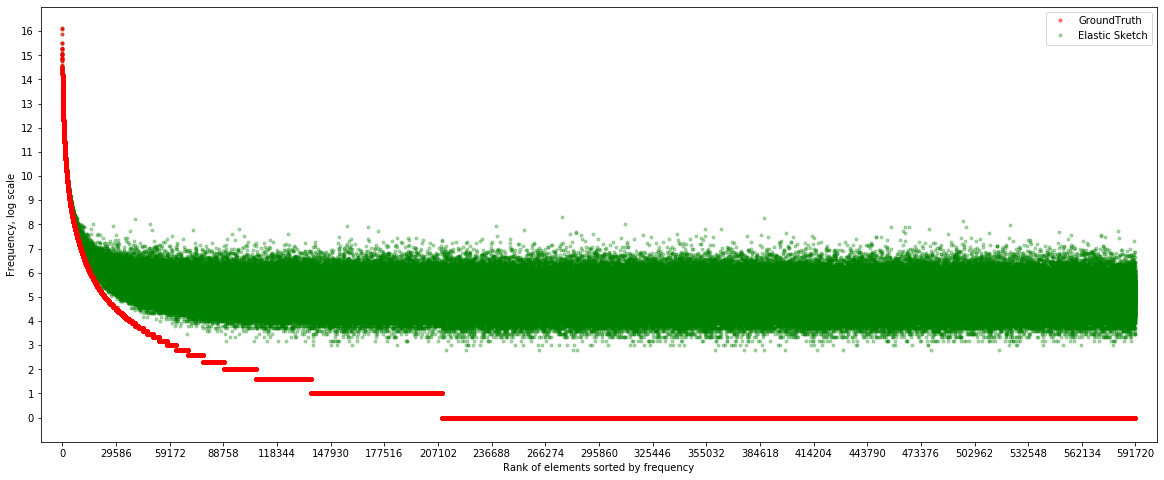

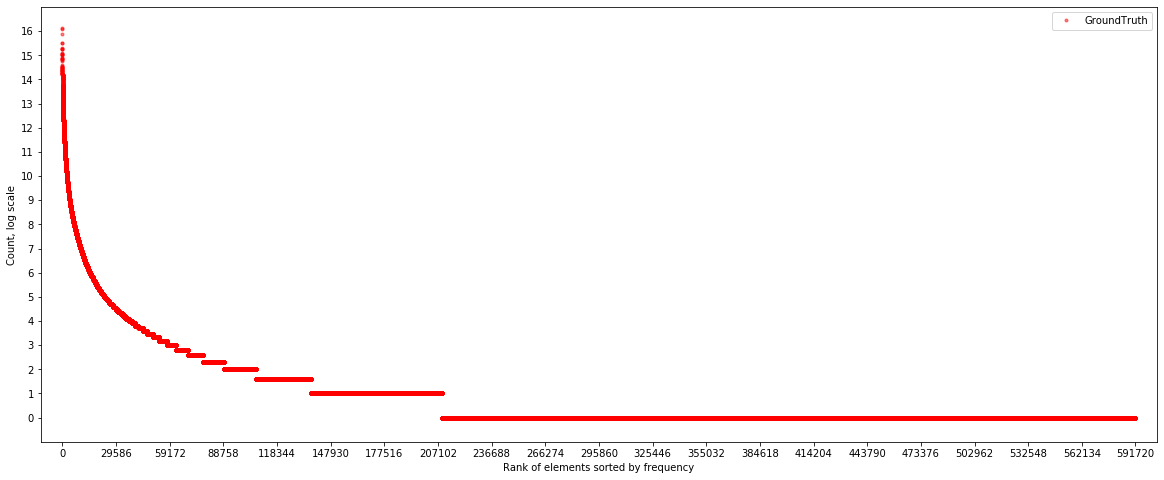

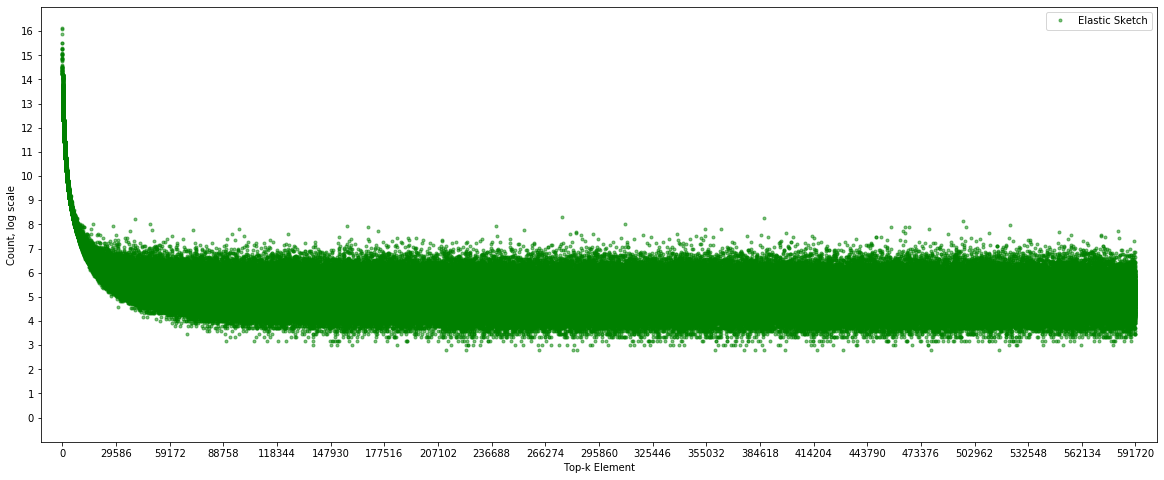

In [10]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
from pympler import asizeof
import re

from cms.CountMinSketch import CountMinSketch

dataset='webdocs'
# =============================dataset path and file=============================
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
threshold=8
w=28000
d=8
size=1024
topk=1024
TC.Set_default(w,d,size,topk)
cms=CountMinSketch(TC.width,TC.depth)    
Top=[None]*TC.size
totalcount=0

# =============================Stream processing=============================
item_count=True
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                #item_count-=1
                index=TF.positionES(DS.Tail(e,1),1)
                    # one hash only              
                #print("index:{}".format(index))
                if Top[index]==None:
                    # bucket is empty
                    Top[index]=DS.esNode(e)
                else:
                    if Top[index].ID ==e:
                        # hit in Top
                        Top[index].vote_pos+=1
                    elif Top[index].ID !=e:
                        # e ollisions with e' at Top
                        Top[index].vote_neg+=1
                        vote_threshold=Top[index].vote_neg/Top[index].vote_pos
                        if vote_threshold<threshold:
                            # less than threshold: send (e,1) to CMS 
                            cms.Add_CMS(DS.Tail(e,1))
                        else:
                            # larger than threshold, evict e' to CMS and set (e,1,T,1)
                            cms.Add_CMS(DS.Tail(Top[index].ID,Top[index].vote_pos))
                            #cms.Add_CMS(e,Top[index].vote_pos)
                            Top[index]=DS.esNode(e,1,True,1)
end=time.time()
# =============================Print and Plot result=============================
#Topli=list(sorted(Top, key=lambda item: item.vote_pos,reverse=True))
    # sorted
print("Top-{},Sketch:{}*{}".format(size,d,w))
print("Execution time:{:8.3f} seconds.".format(end-start))

# Element-Precision

# Memory usage
field1=asizeof.asizeof(Top[0].flag)
field2=asizeof.asizeof(Top[0].ID)
field3=asizeof.asizeof(Top[0].vote_neg)
field4=asizeof.asizeof(Top[0].vote_pos)
node_memory=field1+field2+field3+field4

#sk0=asizeof.asizeof(Top)
sk0=node_memory*TC.size
sk1=asizeof.asizeof(cms)
print("Top_list with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1)/1024))


# Count ARE/AAE in Top

# set True-Positive Top_dict
Top_dict=dict()
for item in Top:
    #item.ID:str
    if item.flag==False:
        Top_dict[item.ID]=item.vote_pos
    else:
        Top_dict[item.ID]=TF.esQuery(item.ID,Top,cms)
    # set comparison , no sort needed
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 

# Top-k compare
TF.Plot_topk_compare(gr_path,Top_dict,"Elastic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=TF.esQuery(item,Top,cms)
TF.Plot_all_compare(ground_truth,My_result,"Elastic Sketch")


# =============================result to csv=============================
import pandas as pd
path="..\\result\\Ela\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='Ela_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='Ela_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(cms.sketch).to_csv((os.path.join(path,filename)))

